# Plot Scores for Columns of MSA

## Import and Clean Data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR30560\P0A850_ortholog_msa_scores2.data"

df = pd.read_csv(in_fh)

In [2]:
# remove columns with no information
df_clean = df[df.Identity != 'X']

print(len(df_clean), "columns used in analysis.\n")

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes

119 columns used in analysis.



c:\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Identity                    object
Percent Identity           float64
Avg Blosum62 Score         float64
Avg Frequency Score        float64
Fraction Aligned           float64
Fraction Disordered        float64
Avg Disorder Strength      float64
Avg Frequency Ratio        float64
Log Avg Frequency Ratio    float64
Avg Log Odds Frequency     float64
dtype: object

## Distributions of Each Score

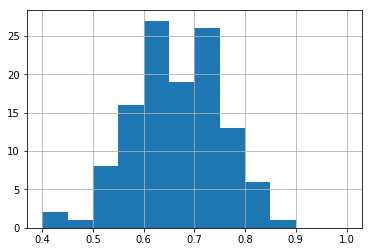

In [3]:
df_clean['Avg Frequency Score'].hist(bins = np.arange(0.4, 1.01, 0.05));

no column where, on avg, codon freq is lower than expected

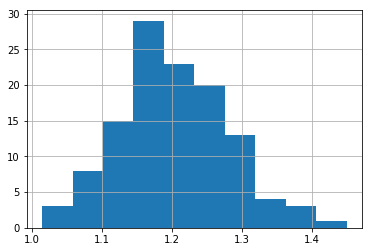

In [4]:
df_clean['Avg Frequency Ratio'].hist();

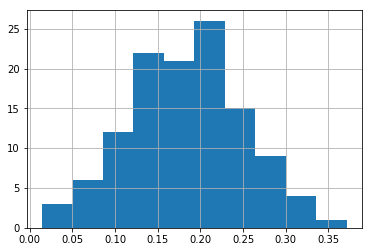

In [5]:
df_clean['Log Avg Frequency Ratio'].hist();

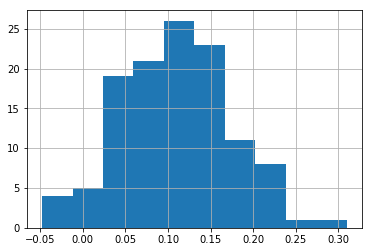

In [6]:
df_clean['Avg Log Odds Frequency'].hist();

Some here are below zero, therefore some positions have codons that occur less freq than expected on avgerage. Different from above two graphs

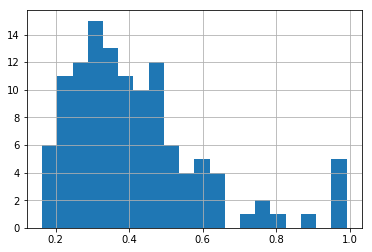

In [32]:
df_clean['Percent Identity'].hist(bins = 20);

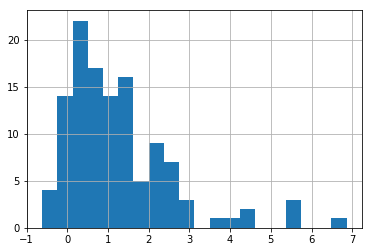

In [17]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

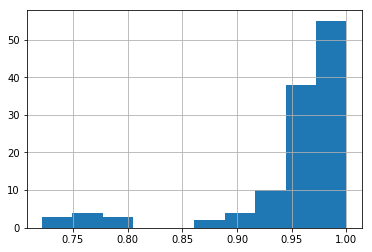

In [15]:
df_clean['Fraction Aligned'].hist();

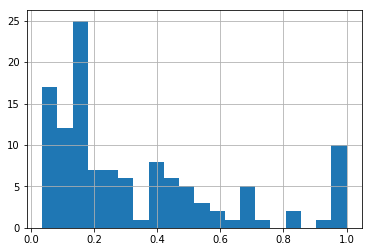

In [55]:
df_clean['Fraction Disordered'].hist(bins = 20);

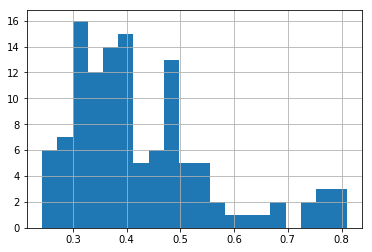

In [56]:
df_clean['Avg Disorder Strength'].hist(bins = 20);

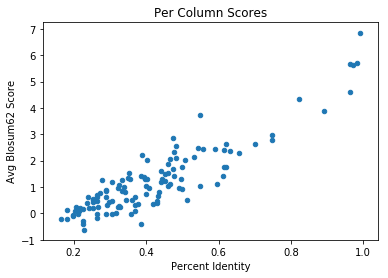

In [62]:
df_clean.plot.scatter('Percent Identity', 'Avg Blosum62 Score', title='Per Column Scores');

## Plot Column Scores

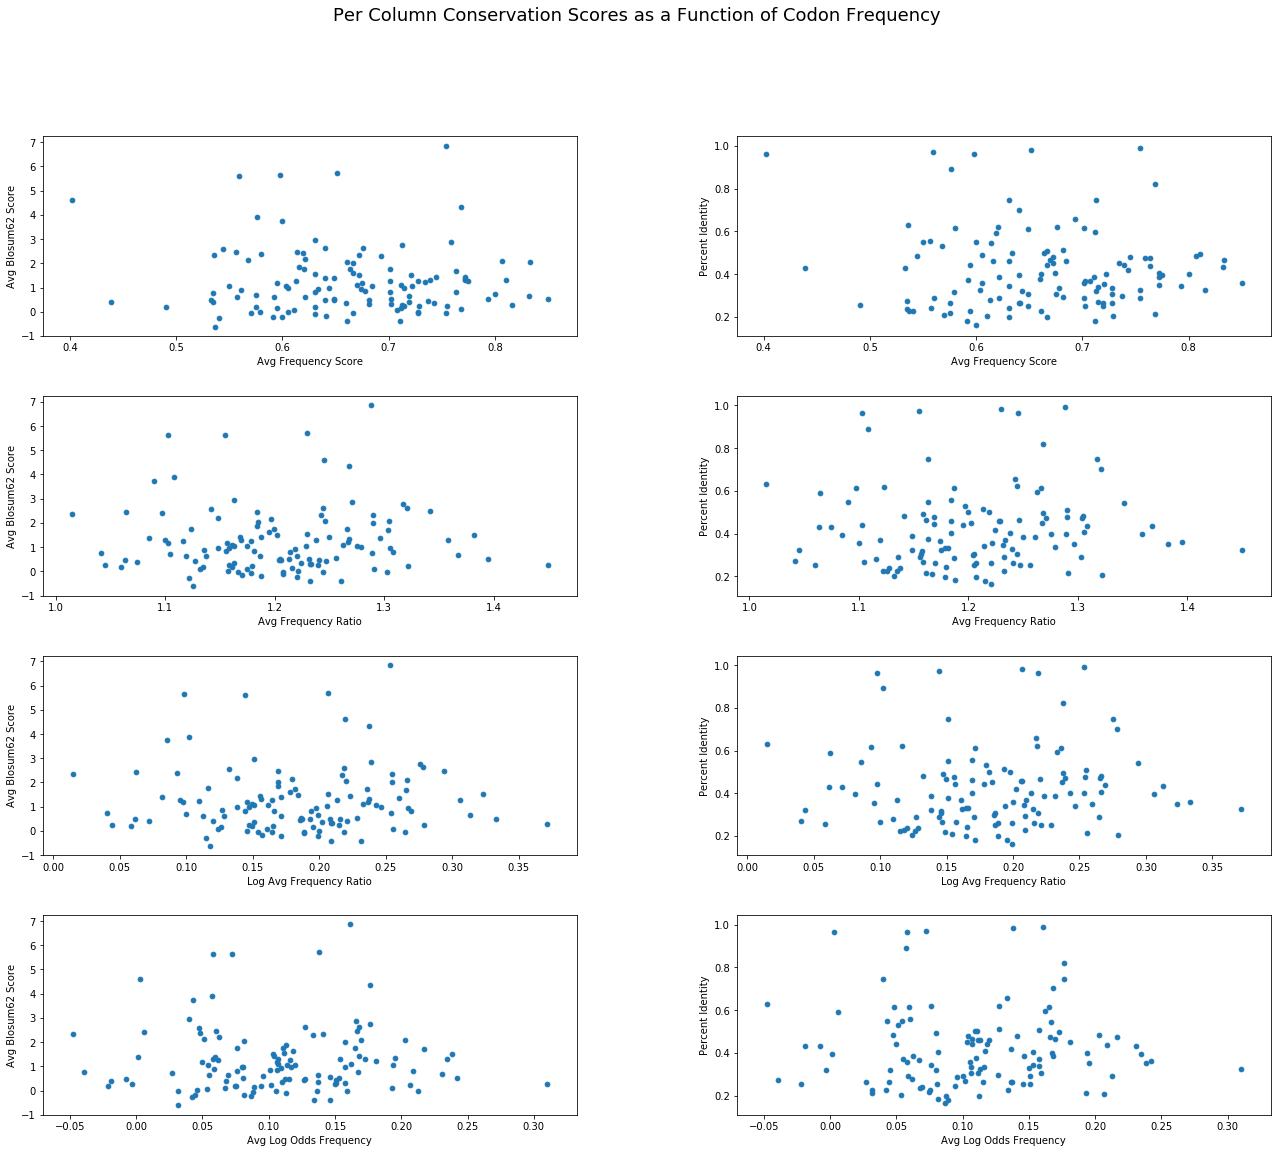

In [16]:
# each array is a row; figsize=(width,height)
fig, ([ax1,ax2], [ax3,ax4], [ax5,ax6], [ax7,ax8]) = plt.subplots(4, 2, sharex='row', figsize=(22,18), 
                                                                 subplot_kw={'xlabel':"Avg Frequency Score"})

fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)


ax1.scatter(df_clean['Avg Frequency Score'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set_ylabel('Avg Blosum62 Score')

ax2.scatter(df_clean['Avg Frequency Score'], df_clean['Percent Identity'], s=22)
ax2.set_ylabel('Percent Identity')

ax3.scatter(df_clean['Avg Frequency Ratio'], df_clean['Avg Blosum62 Score'], s=22)
ax3.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score')

ax4.scatter(df_clean['Avg Frequency Ratio'], df_clean['Percent Identity'], s=22)
ax4.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity')

ax5.scatter(df_clean['Log Avg Frequency Ratio'], df_clean['Avg Blosum62 Score'], s=22)
ax5.set(xlabel='Log Avg Frequency Ratio', ylabel='Avg Blosum62 Score')

ax6.scatter(df_clean['Log Avg Frequency Ratio'], df_clean['Percent Identity'], s=22)
ax6.set(xlabel='Log Avg Frequency Ratio', ylabel='Percent Identity')

ax7.scatter(df_clean['Avg Log Odds Frequency'], df_clean['Avg Blosum62 Score'], s=22)
ax7.set(xlabel='Avg Log Odds Frequency', ylabel='Avg Blosum62 Score')

ax8.scatter(df_clean['Avg Log Odds Frequency'], df_clean['Percent Identity'], s=22)
ax8.set(xlabel='Avg Log Odds Frequency', ylabel='Percent Identity')

fig.subplots_adjust(hspace=0.3, wspace=0.3);


What differences are observed between the four different frequency scores used?

## Fraction Disorder Split at 50% for same scores above

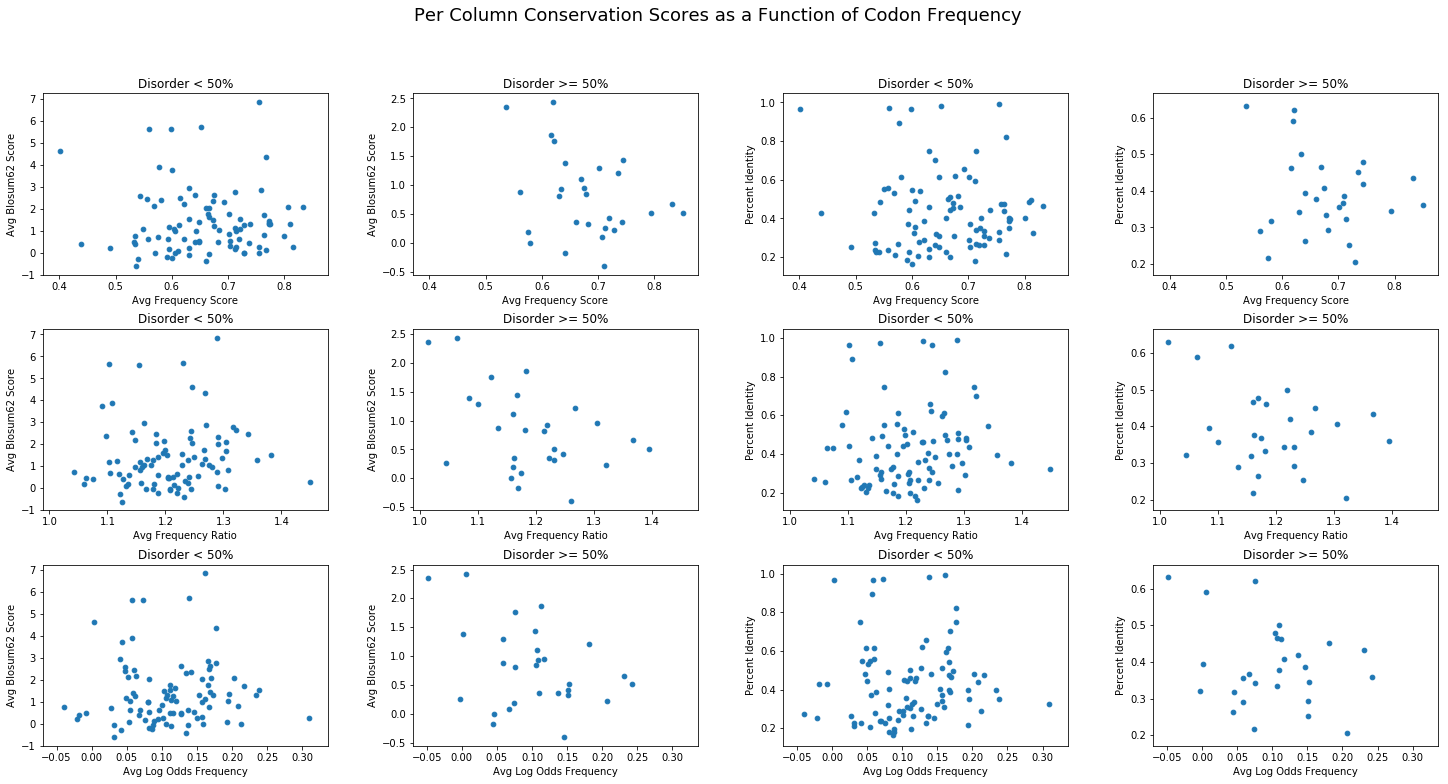

In [24]:
# make 2 subplots share yaxis? get all blossum share and all pecent id share?
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8], [ax9,ax10,ax11,ax12]) = plt.subplots(3, 4, sharex='row', figsize=(25,12), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

# freq score
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

#ax2 = plt.subplot(2,4,(2,2))

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# freq ratio
ax5.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax5.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax6.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax7.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax7.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax8.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder >= 50%')


# avg log odds freq
ax9.scatter(df_clean_dis1['Avg Log Odds Frequency'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax9.set(xlabel="Avg Log Odds Frequency", ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax10.scatter(df_clean_dis2['Avg Log Odds Frequency'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax10.set(xlabel="Avg Log Odds Frequency", ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax11.scatter(df_clean_dis1['Avg Log Odds Frequency'], df_clean_dis1['Percent Identity'], s=22)
ax11.set(xlabel="Avg Log Odds Frequency", ylabel='Percent Identity', title='Disorder < 50%')

ax12.scatter(df_clean_dis2['Avg Log Odds Frequency'], df_clean_dis2['Percent Identity'], s=22)
ax12.set(xlabel="Avg Log Odds Frequency", ylabel='Percent Identity', title='Disorder >= 50%')

fig.subplots_adjust(hspace=0.3, wspace=0.3);

any diff seen in scores here either?

Comparison between ratio and log raio; no diff

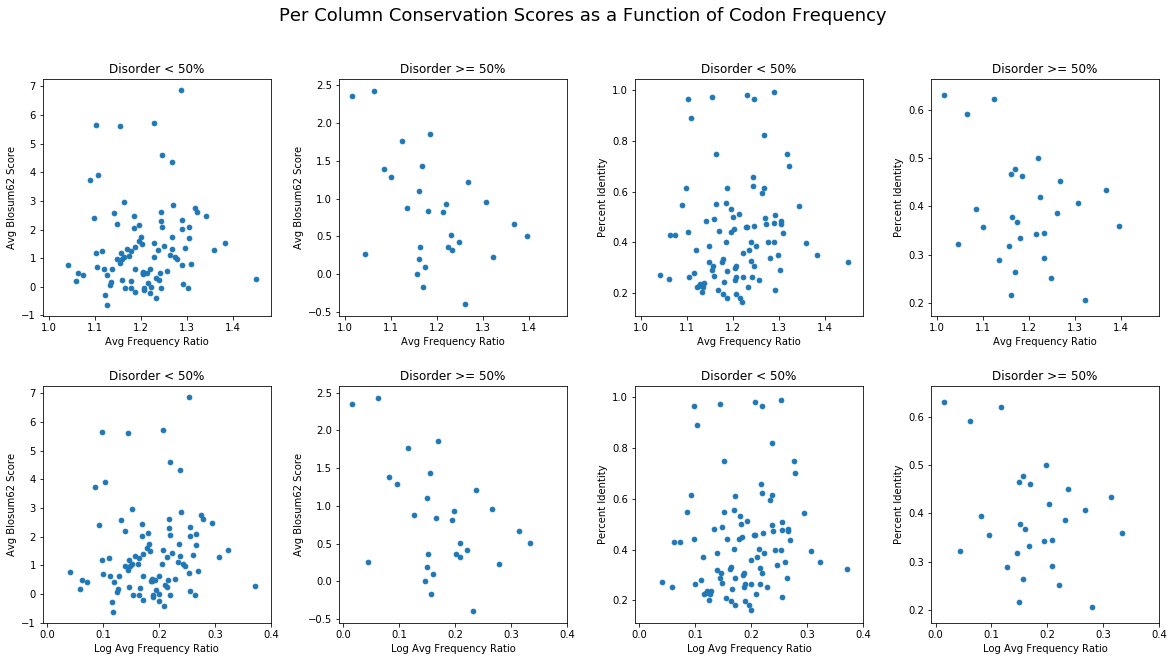

In [20]:
fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8]) = plt.subplots(2, 4, sharex='row', figsize=(20,10), 
                                                           subplot_kw={'xlabel':"Avg Frequency Ratio"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

# freq ratio
ax1.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax3.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# log freq ratio
ax5.scatter(df_clean_dis1['Log Avg Frequency Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax5.set(xlabel='Log Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis2['Log Avg Frequency Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax6.set(xlabel='Log Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax7.scatter(df_clean_dis1['Log Avg Frequency Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax7.set(xlabel='Log Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis2['Log Avg Frequency Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax8.set(xlabel='Log Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder >= 50%')

fig.subplots_adjust(hspace=0.3, wspace=0.3)



Less blurry,larger versions below

In [59]:
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

def plot_consv_scatters(column_name):

    fig, ([ax1,ax2], [ax3,ax4]) = plt.subplots(2, 2, sharex=True, sharey ='row', figsize=(15,10), 
                                               subplot_kw={'xlabel':column_name})
    fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

    # freq score
    ax1.scatter(df_clean_dis1[column_name], df_clean_dis1['Avg Blosum62 Score'], s=22)
    ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

    ax2.scatter(df_clean_dis2[column_name], df_clean_dis2['Avg Blosum62 Score'], s=22)
    ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


    ax3.scatter(df_clean_dis1[column_name], df_clean_dis1['Percent Identity'], s=22)
    ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

    ax4.scatter(df_clean_dis2[column_name], df_clean_dis2['Percent Identity'], s=22)
    ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


    # turn on axis tick labels even though axis is shared
    for ax in fig.axes:
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)

    fig.subplots_adjust(hspace=0.3, wspace=0.3);

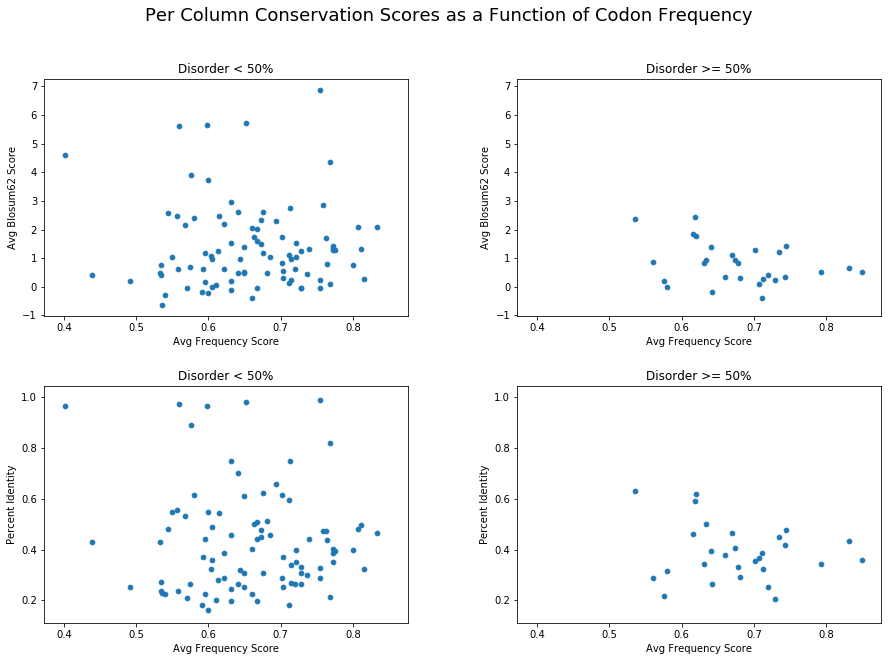

In [60]:
plot_consv_scatters("Avg Frequency Score")

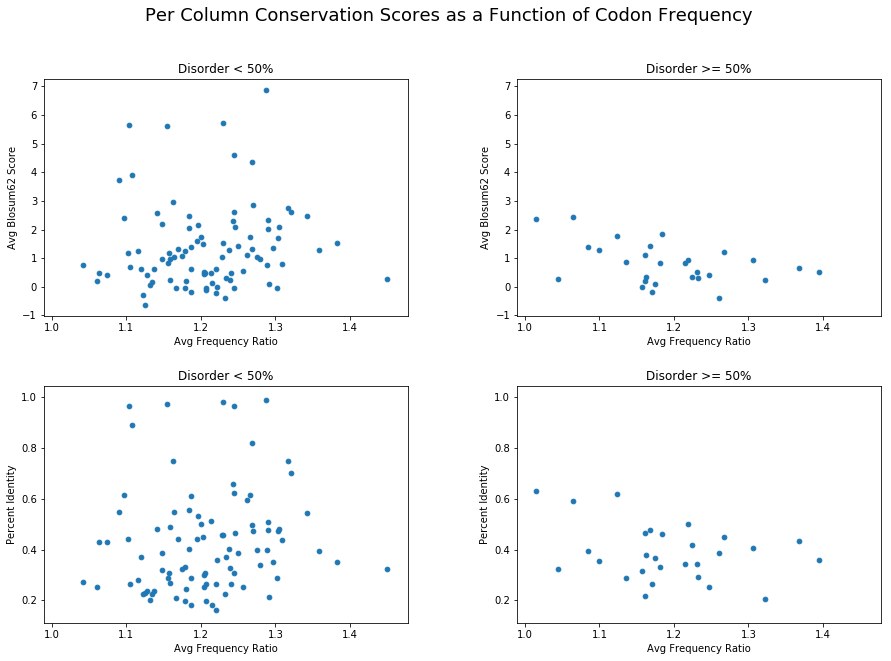

In [61]:
plot_consv_scatters('Avg Frequency Ratio')

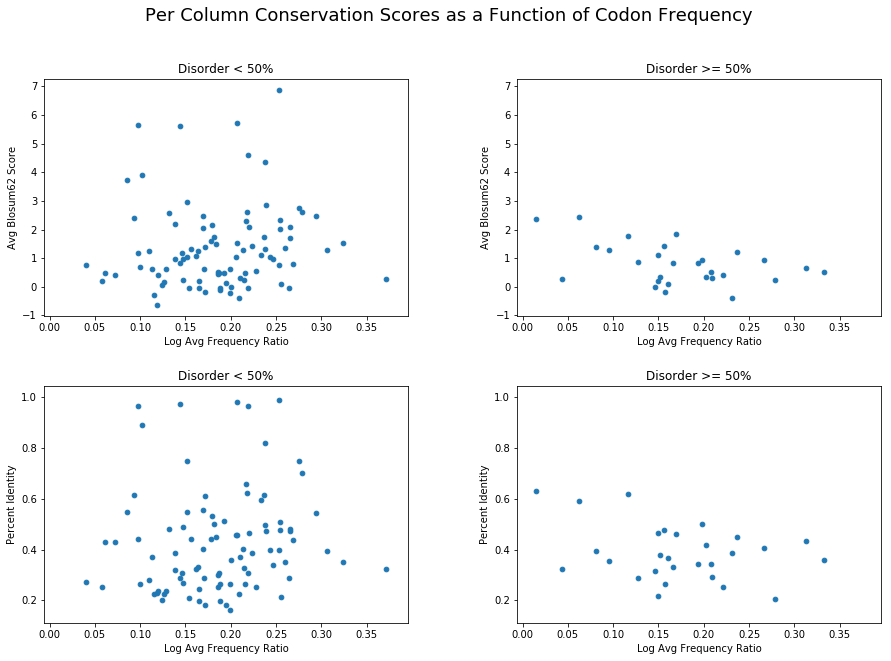

In [62]:
plot_consv_scatters('Log Avg Frequency Ratio')

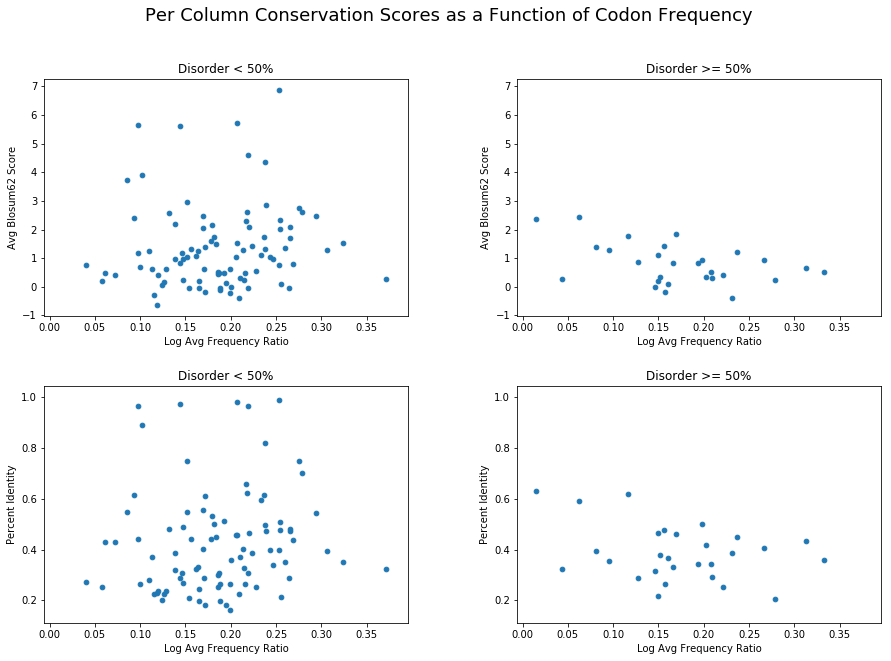

In [62]:
plot_consv_scatters('Avg Log Odds Frequency')

## Split at 50% Disorder Strength doesnt change anything as expected since vsl2 splits at 50% strength for labeling disorder or order

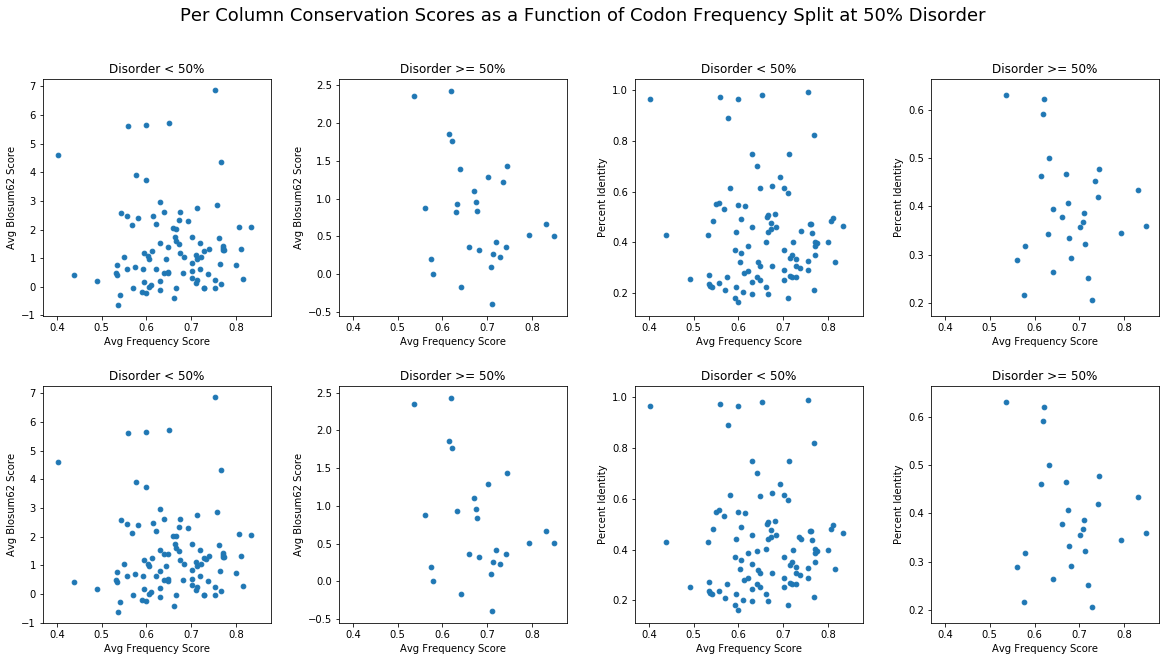

In [149]:
df_clean_dis3 = df_clean[df_clean['Avg Disorder Strength'] < 0.5]
df_clean_dis4 = df_clean[df_clean['Avg Disorder Strength'] >= 0.5]

fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8]) = plt.subplots(2, 4, sharex='row', figsize=(20,10), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency Split at 50% Disorder", fontsize=18)

# Fraction Disorder
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# Disorder Strength
ax5.scatter(df_clean_dis3['Avg Frequency Score'], df_clean_dis3['Avg Blosum62 Score'], s=22)
ax5.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis4['Avg Frequency Score'], df_clean_dis4['Avg Blosum62 Score'], s=22)
ax6.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax7.scatter(df_clean_dis3['Avg Frequency Score'], df_clean_dis3['Percent Identity'], s=22)
ax7.set(ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis4['Avg Frequency Score'], df_clean_dis4['Percent Identity'], s=22)
ax8.set(ylabel='Percent Identity', title='Disorder >= 50%')


fig.subplots_adjust(hspace=0.3, wspace=0.3);

Attempting to filter by fraction aligned produced no differences (maybe shrink size of window)

In [39]:
print(min(df_clean['Fraction Aligned']))

0.7217391304347827


In [40]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [41]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [42]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio
637,V,0.630952,2.354274,0.535714,0.730435,0.988095,0.809245,1.014837
1524,L,0.406977,0.952941,0.674419,0.747826,0.837209,0.616585,1.305469
1601,x,0.385542,-0.398472,0.710843,0.721739,1.000000,0.801928,1.260474


In [43]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio
638,T,0.344828,0.511361,0.793103,0.756522,0.988506,0.773630,1.231490
647,V,0.367925,0.090925,0.707547,0.921739,0.990566,0.789183,1.174391
648,E,0.377358,0.356155,0.660377,0.921739,1.000000,0.773554,1.163139
649,T,0.216981,0.192992,0.575472,0.921739,0.971698,0.728493,1.160834
650,E,0.264151,-0.171249,0.641509,0.921739,0.952830,0.679067,1.169929
651,E,0.289720,0.876565,0.560748,0.930435,0.906542,0.648846,1.135412
652,N,0.252336,0.420384,0.719626,0.930435,0.831776,0.594928,1.247330
653,S,0.317757,0.002292,0.579439,0.930435,0.738318,0.564553,1.157200
654,K,0.205607,0.226944,0.728972,0.930435,0.616822,0.524306,1.321664
655,V,0.342342,0.816708,0.630631,0.965217,0.549550,0.496697,1.214185


## Distribution of Each Score Split at 50% Fraction Disorder

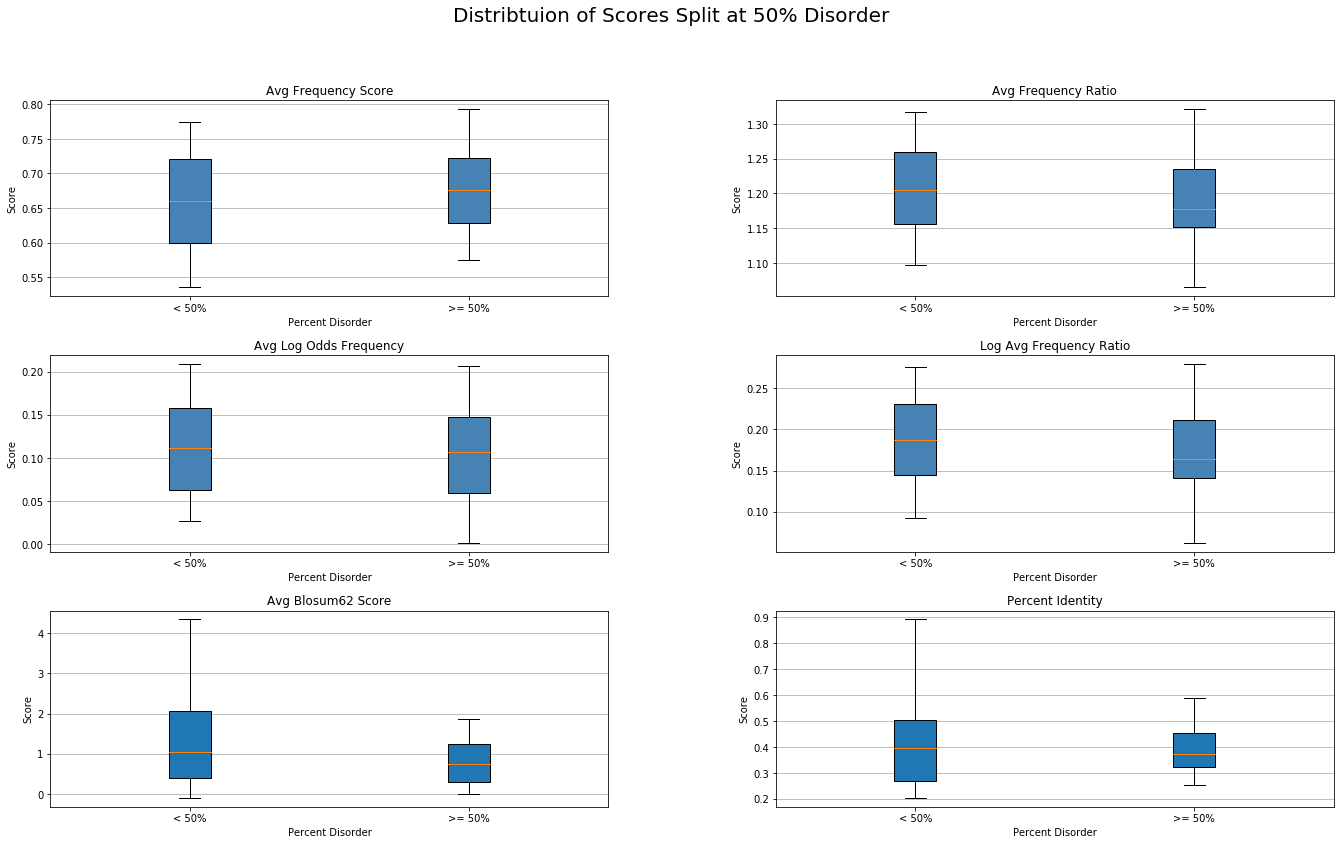

In [28]:
fig, ([ax1,ax2], [ax3,ax4], [ax5,ax6]) = plt.subplots(3, 2, figsize=(23,13), subplot_kw={'xlabel':"Percent Disorder", 'ylabel': 'Score'})
fig.suptitle("Distribtuion of Scores Split at 50% Disorder", fontsize=20)

color = "steelblue"
ax1.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax1.set(title="Avg Frequency Score")

ax2.boxplot([df_clean_dis1["Avg Frequency Ratio"], df_clean_dis2["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax2.set(title="Avg Frequency Ratio")



ax3.boxplot([df_clean_dis1["Avg Log Odds Frequency"], df_clean_dis2["Avg Log Odds Frequency"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax3.set(title="Avg Log Odds Frequency")

ax4.boxplot([df_clean_dis1["Log Avg Frequency Ratio"], df_clean_dis2["Log Avg Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax4.set(title="Log Avg Frequency Ratio")



ax5.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)
ax5.set(title="Avg Blosum62 Score")

ax6.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)
ax6.set(title="Percent Identity")


for ax in fig.axes:
    ax.set_xticklabels(["< 50%", ">= 50%"])   # wouldn't work in subplot_kw
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(True, axis='y')

# try to get median values to place the number of obsv in box
'''
nobs = [len(df_clean_dis1), len(df_clean_dis2)]
nobs = ['n: ' + str(num) for num in nobs]
pos = range(len(nobs))
for ax in fig.axes:
    for tick,label in zip(pos, ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='x-small', color='w', weight='semibold')    
'''   
    

fig.subplots_adjust(hspace=0.3, wspace=0.3);

Box plots look rough when made into large figure. 1x1 below

In [52]:
def plot_boxplot(column_name):
    '''
    Plots 1 boxplot with 2 boxes split by 50% Disorder
    '''
    plt.figure(figsize=(10, 5)) # shrink later if wanted
    plt.grid(True, axis='y')

    # example of how to set each box same color
    color = "steelblue"
    boxplot = plt.boxplot([df_clean_dis1[column_name], df_clean_dis2[column_name]], whis=[5, 95], showfliers=False,
                          patch_artist=True, boxprops=dict(facecolor=color, color="black"))

    plt.xticks([1,2], ["< 50%", ">= 50%"])
    #plt.yticks(fontsize=12)
    plt.ylabel(column_name, fontsize=15)
    plt.xlabel('Percent Disorder', fontsize=15)
    plt.title(column_name + ' Distribution Split at 50% Disorder', fontsize=18);

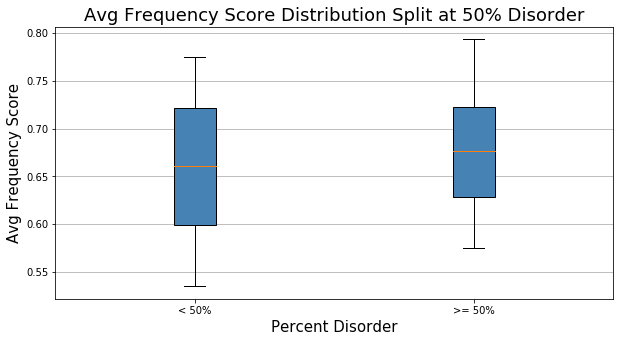

In [53]:
plot_boxplot("Avg Frequency Score")

Using Freq ratio (small drop in upper 50%, but still minor diff between the groups)

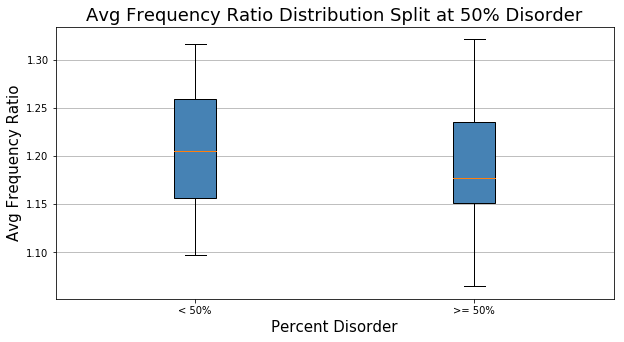

In [54]:
plot_boxplot("Avg Frequency Ratio")

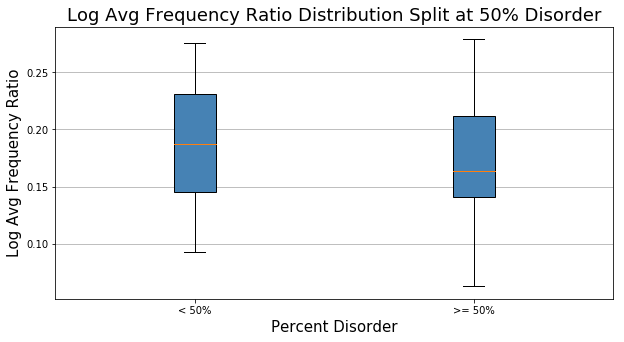

In [55]:
plot_boxplot("Log Avg Frequency Ratio")

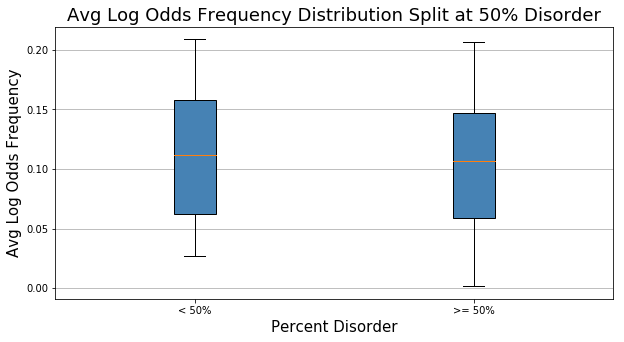

In [56]:
plot_boxplot("Avg Log Odds Frequency")

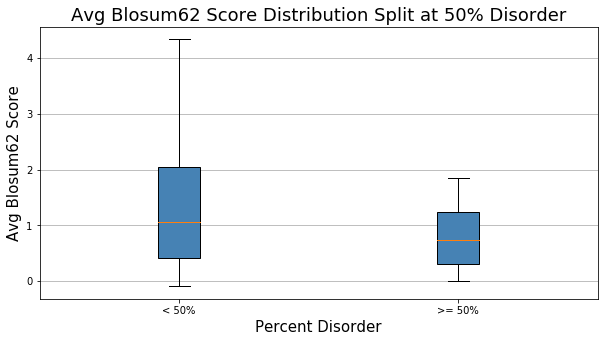

In [57]:
plot_boxplot('Avg Blosum62 Score')

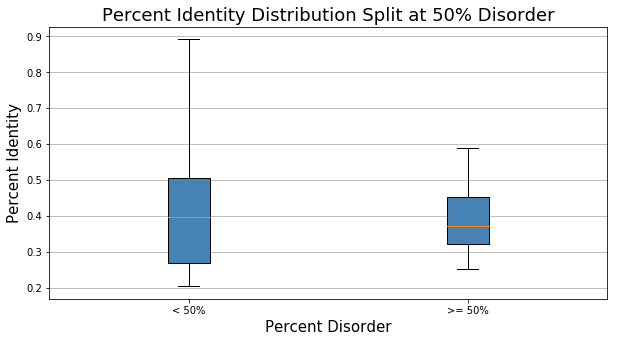

In [58]:
plot_boxplot('Percent Identity')

## Plot Scores as a Function of Disorder

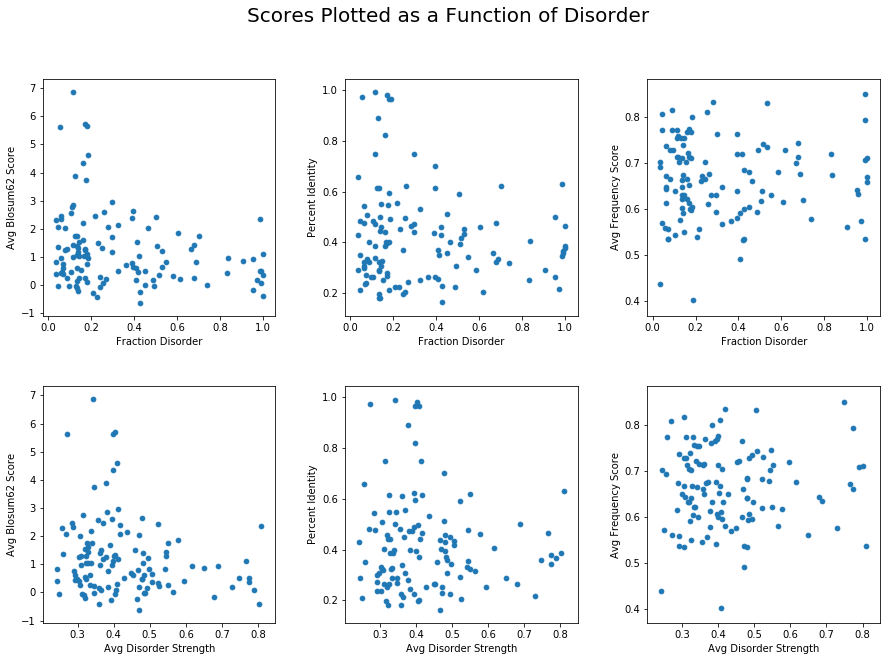

In [147]:
fig, ([ax1,ax2, ax3], [ax4,ax5,ax6]) = plt.subplots(2, 3, figsize=(15,10), sharex='row', sharey='col', 
                                                    subplot_kw={'xlabel':"Percent Disorder", 'ylabel': 'Score'})

fig.suptitle("Scores Plotted as a Function of Disorder", fontsize=20)

ax1.scatter(df_clean['Fraction Disordered'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set(xlabel='Fraction Disorder', ylabel='Avg Blosum62 Score')

ax2.scatter(df_clean['Fraction Disordered'], df_clean['Percent Identity'], s=22)
ax2.set(xlabel='Fraction Disorder', ylabel='Percent Identity')

ax3.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Score'], s=22)
ax3.set(xlabel='Fraction Disorder', ylabel='Avg Frequency Score')

ax4.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Blosum62 Score'], s=22)
ax4.set(xlabel='Avg Disorder Strength', ylabel='Avg Blosum62 Score')

ax5.scatter(df_clean['Avg Disorder Strength'], df_clean['Percent Identity'], s=22)
ax5.set(xlabel='Avg Disorder Strength', ylabel='Percent Identity')

ax6.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Score'], s=22)
ax6.set(xlabel='Avg Disorder Strength', ylabel='Avg Frequency Score')

 
fig.subplots_adjust(hspace=0.3, wspace=0.3);

Very little change between Fraction Disorder and Avg Disorder Score

## Fraction Disorder Filters

In [30]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

64

In [31]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

27

In [32]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

15

In [33]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

13

## Disorder Strength Filters

In [34]:
df_clean_25ds = df_clean[df_clean['Avg Disorder Strength'] <= 0.25]
len(df_clean_25ds)

3

In [35]:
df_clean_50ds = df_clean[(df_clean['Avg Disorder Strength'] <= 0.50) & (df_clean['Avg Disorder Strength'] > 0.25)]
len(df_clean_50ds)

91

In [36]:
df_clean_75ds = df_clean[(df_clean['Avg Disorder Strength'] <= 0.75) & (df_clean['Avg Disorder Strength'] > 0.50)]
len(df_clean_75ds)

19

In [37]:
df_clean_100ds = df_clean[(df_clean['Avg Disorder Strength'] <= 1.0) & (df_clean['Avg Disorder Strength'] > 0.75)]
len(df_clean_100ds)

6

## Boxplots for 25% disorder split 

In [45]:
def plot_boxplots(column_name):
    '''
    Expects the above dataframes to be defined.
    Plots 2 boxplots with 4 boxes split by 25% Disorder
    '''
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10), sharey=True)
    fig.suptitle("Distribtuion of " + column_name + " Split at Every 25% Disorder", fontsize=27)
    color = "steelblue"

    ax1.boxplot([df_clean_25d[column_name], df_clean_50d[column_name], df_clean_75d[column_name], df_clean_100d[column_name]],
                whis=[5, 95], showfliers=False, patch_artist=True, boxprops=dict(facecolor=color, color="black"))


    ax2.boxplot([df_clean_25ds[column_name], df_clean_50ds[column_name], df_clean_75ds[column_name],df_clean_100ds[column_name]], 
                whis=[5, 95], showfliers=False, patch_artist=True, boxprops=dict(facecolor=color, color="black"))

    titles = ["Fraction Disorder", "Avg Disorder Strength"]
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelsize=15)
        ax.set_xlabel("Percent Disorder", fontsize=20)
        ax.set_ylabel(column_name, fontsize=20)
        ax.set_title(titles[i], fontsize=22.5)
        ax.set_xticklabels(["0-25%","25-50%", "50-75%", "75-100%"])   # wouldn't work in subplot_kw
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)
        ax.grid(True, axis='y');


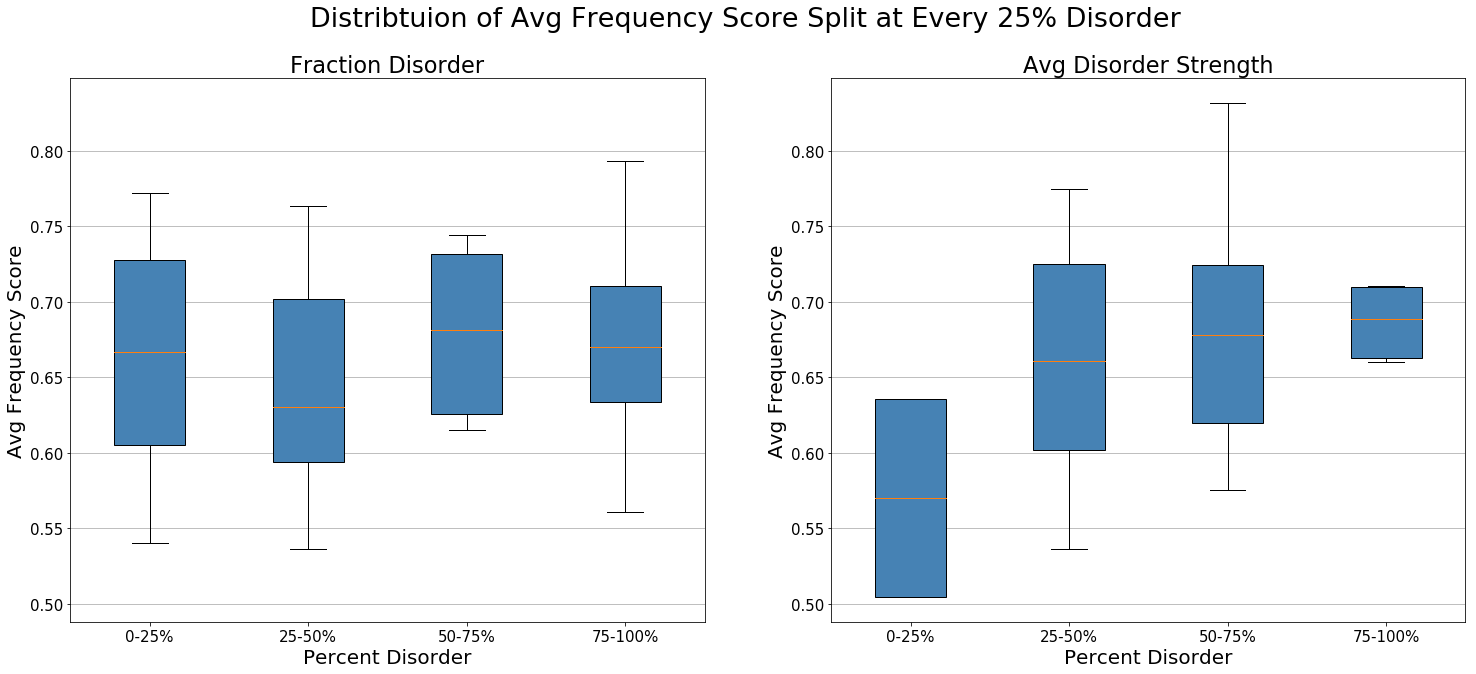

In [46]:
plot_boxplots("Avg Frequency Score")

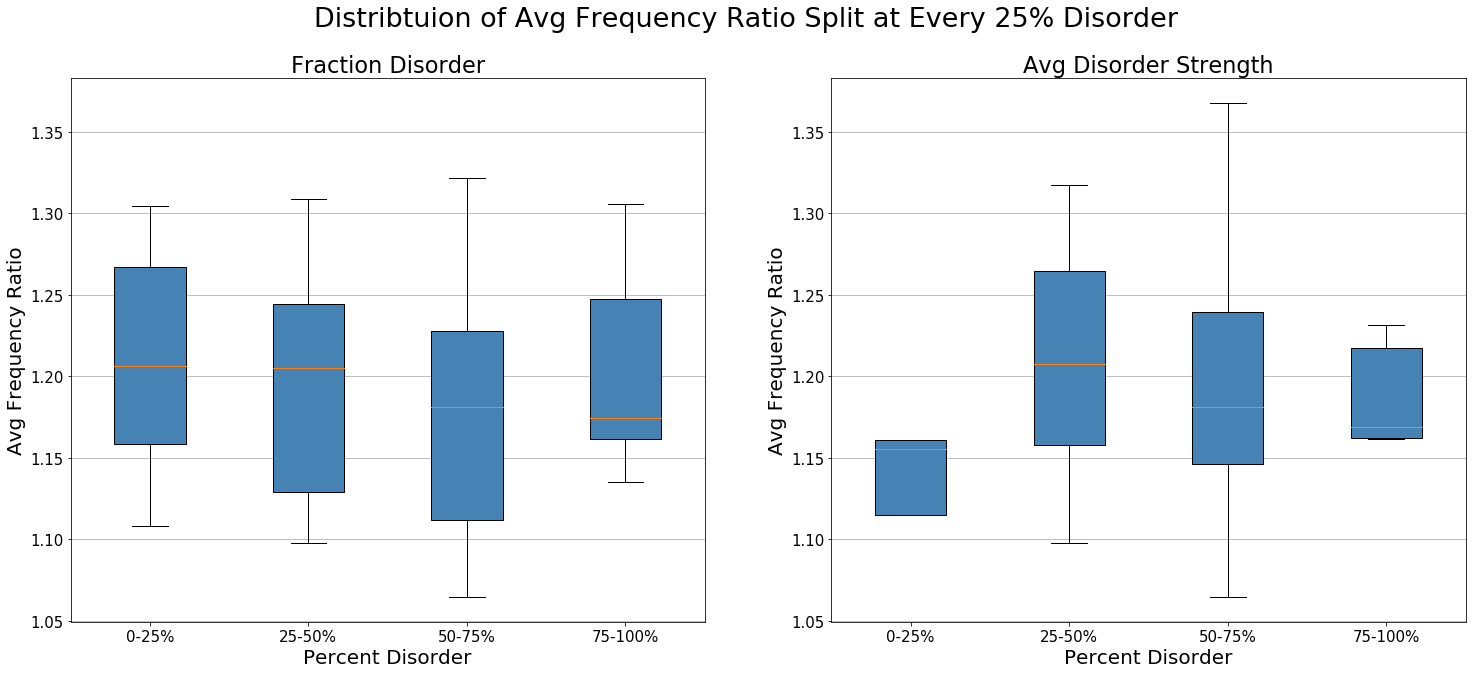

In [47]:
plot_boxplots("Avg Frequency Ratio")

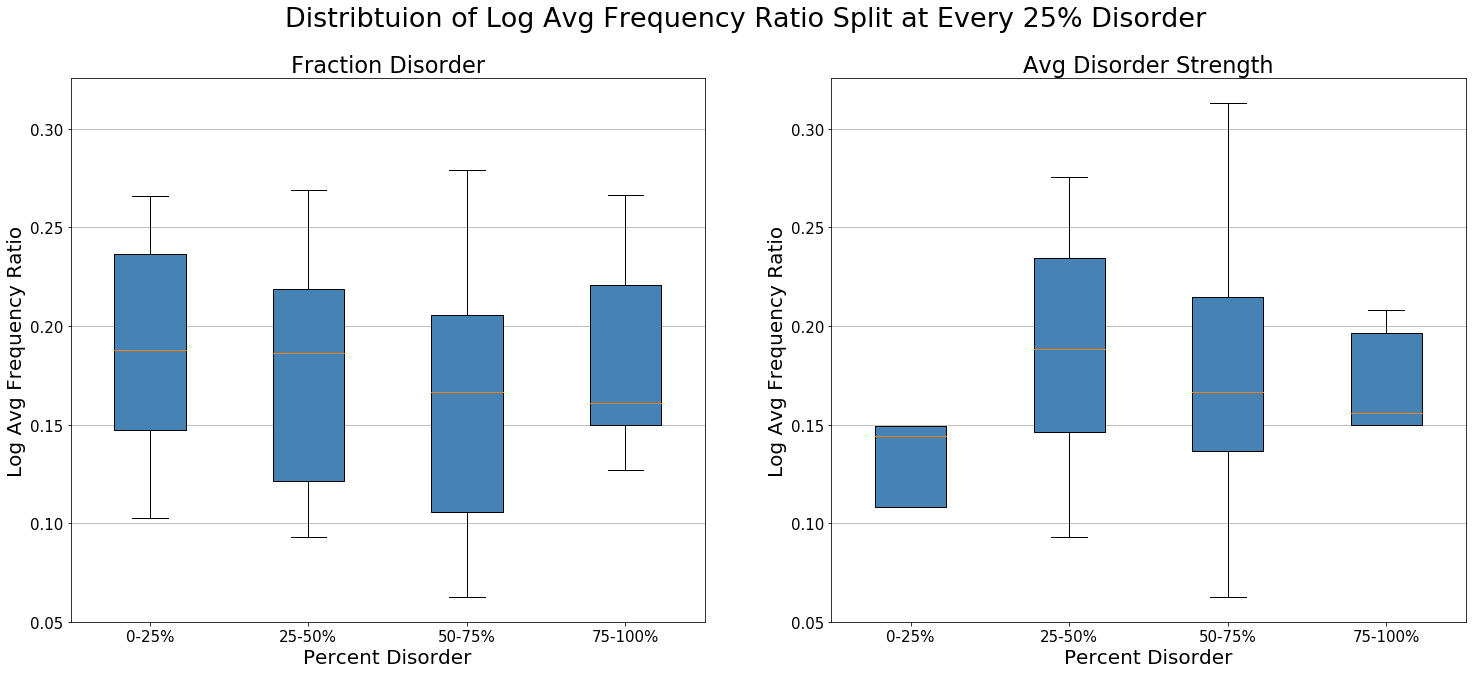

In [48]:
plot_boxplots("Log Avg Frequency Ratio")

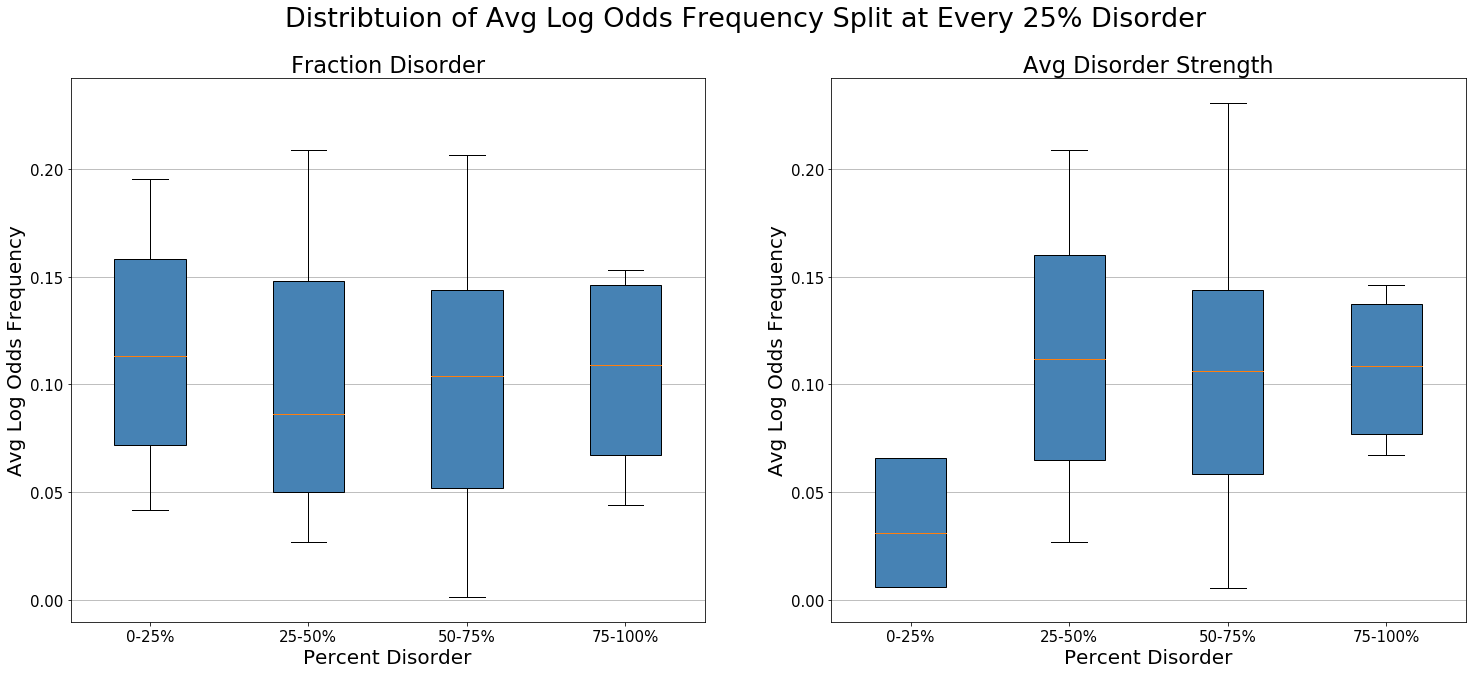

In [49]:
plot_boxplots("Avg Log Odds Frequency")

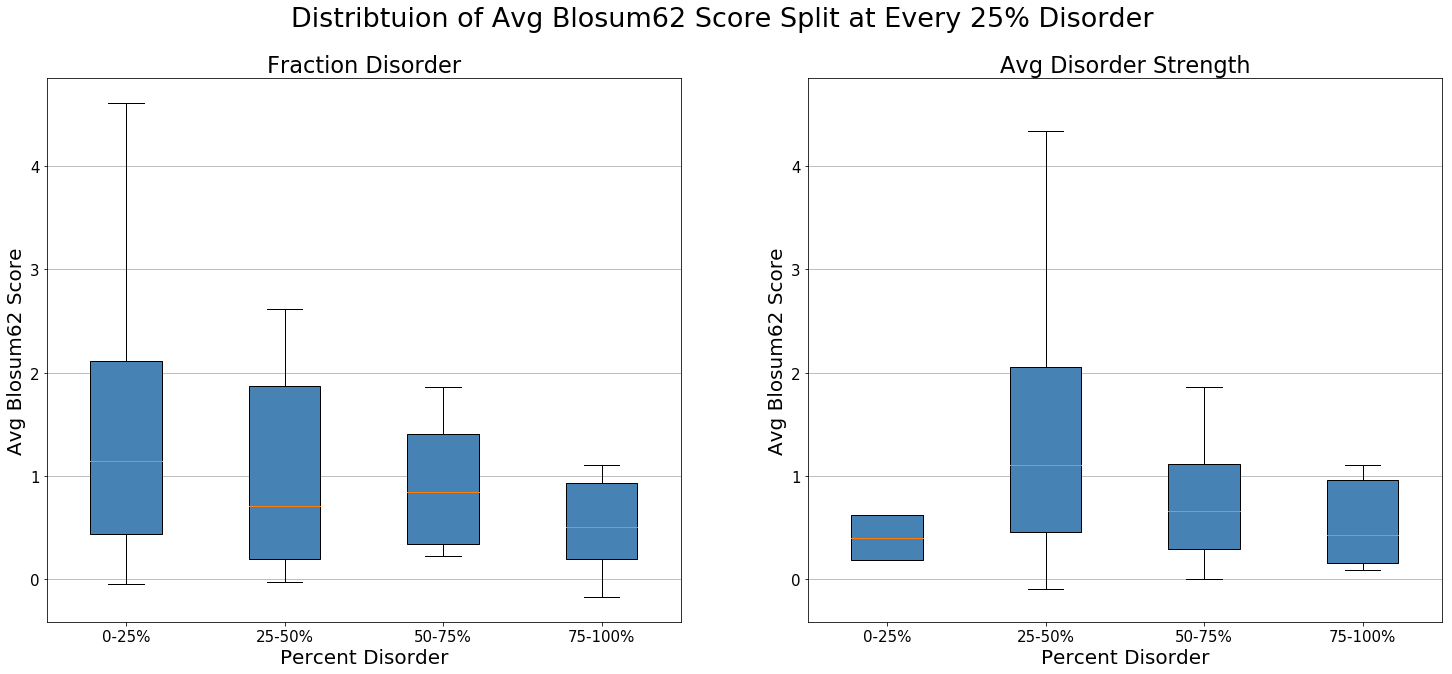

In [50]:
plot_boxplots("Avg Blosum62 Score")

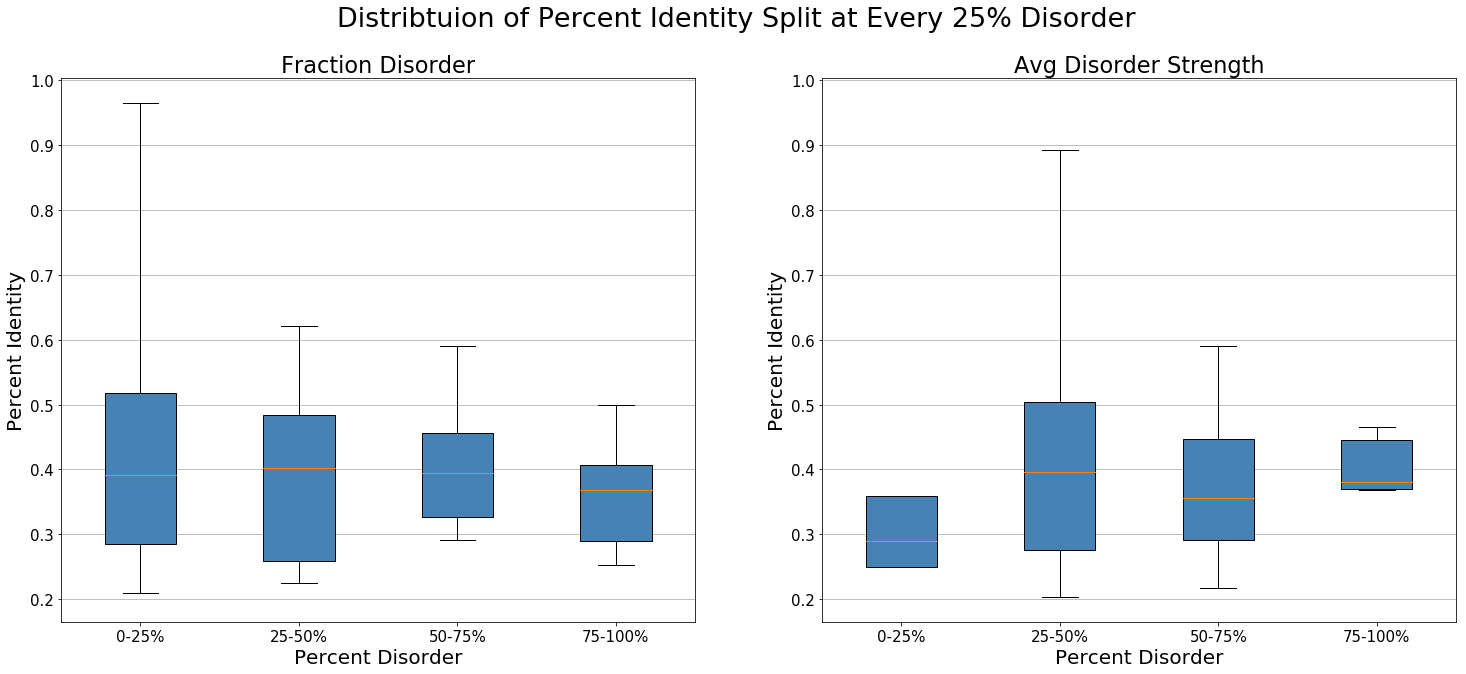

In [51]:
plot_boxplots("Percent Identity")